# **Capstone Project**

## Leading Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `Consumer_Confidence_Index.csv` | Leading | Feature |
| `Business_Confidence_Index.csv` | Leading | Feature |
| `Initial_Claims.csv` | Leading | Feature |
| `Jobs_Added.csv` | Leading | Feature |
| `Housing_Starts.csv` | Leading | Feature |
| `Yield_Curve.csv` | Leading | Feature |
| `Federal_Funds_Rate.csv` | Leading (policy-reactive) | Feature |
| `Supply_Chain_Index.xls` | Leading | Feature |
| `Crude_Oil_Prices.csv` | Contextual | Feature |

In [58]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv', engine='python', on_bad_lines='skip')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Jobs_Added_df = pd.read_csv('Leading/Jobs_Added.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Yield_Curve_df = pd.read_csv('Leading/Yield_Curve.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Jobs_Added_df.to_sql('JobsAdded', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')
Yield_Curve_df.to_sql('YieldCurve', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN BusinessConfidence ON InterestRates.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON InterestRates.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON InterestRates.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON InterestRates.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON InterestRates.observation_date = HousingStarts.observation_date
LEFT JOIN JoblessClaims ON InterestRates.observation_date = JoblessClaims.observation_date
LEFT JOIN JobsAdded ON InterestRates.observation_date = JobsAdded.observation_date
LEFT JOIN Volatility ON InterestRates.observation_date = Volatility.observation_date
LEFT JOIN YieldCurve ON InterestRates.observation_date = YieldCurve.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df


,observation_date,DFF,observation_date,BSCICP02USM460S,observation_date,UMCSENT,observation_date,NFCICREDIT,observation_date,WTISPLC,observation_date,HOUST,observation_date,ICSA,observation_date,PAYEMS,observation_date,VIXCLS,observation_date,T10Y2Y
0,1976-01-01,4.83,1976-01-01,17.6,1976-01-01,81.567391,1976-01-01,-2.05371,1976-01-01,11.16,1976-01-01,1367,1976-01-01,360846,1976-01-01,78503,None,NaN,None,NaN
1,1976-04-01,5.20,1976-04-01,21.2,1976-04-01,83.733333,1976-04-01,-2.21140,1976-04-01,12.17,1976-04-01,1395,1976-04-01,385692,1976-04-01,79292,None,NaN,None,NaN
2,1976-07-01,5.28,1976-07-01,11.8,1976-07-01,87.543478,1976-07-01,-1.97208,1976-07-01,12.17,1976-07-01,1401,1976-07-01,395231,1976-07-01,79547,None,NaN,1976-07-01,0.98
3,1976-10-01,4.87,1976-10-01,7.0,1976-10-01,87.909783,1976-10-01,-1.56955,1976-10-01,13.90,1976-10-01,1629,1976-10-01,392154,1976-10-01,79911,None,NaN,1976-10-01,1.43
4,1977-01-01,4.66,1977-01-01,9.6,1977-01-01,87.066304,1977-01-01,-1.73878,1977-01-01,13.90,1977-01-01,1527,1977-01-01,404077,1977-01-01,80690,None,NaN,1977-01-01,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-01-01,5.33,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,212154,2024-01-01,157049,2024-01-01,13.71,2024-01-01,-0.26
194,2024-04-01,5.33,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,223615,2024-04-01,157635,2024-04-01,13.98,2024-04-01,-0.33
195,2024-07-01,5.26,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,230769,2024-07-01,158003,2024-07-01,17.07,2024-07-01,-0.25
196,2024-10-01,4.65,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,225462,2024-10-01,158358,2024-10-01,17.36,2024-10-01,0.12


## Lagging Indicators
| File Name | Type | Use |
|-----------|------|-----|
| `PPI_Inflation_Rate.csv` | Lagging | Feature |
| `CPI_Inflation_Rate.csv` | Lagging | Feature |
| `Unemployment_Rate.csv` | Lagging | Feature |
| `Labor_Force_Participation.csv` | Lagging | Feature |
| `Real_Gross_Domestic_Product.csv` | Lagging | **Label source** |
| `Deficit_Percent_GDP.csv` | Lagging | Feature (used in derived fiscal stress index) |


In [59]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Labor_Force_df = pd.read_csv('Lagging/Labor_Force_Participation.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Unemployment_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Corporate_Bond_Spreads_df = pd.read_csv('Lagging/Corporate_Bond_Spreads.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Labor_Force_df.to_sql('Labor_Force', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Unemployment_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Business_Inventories', conn, index=False, if_exists='replace')
Corporate_Bond_Spreads_df.to_sql('Corporate_Bond_Spreads', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM GDP
LEFT JOIN CPI ON GDP.observation_date = CPI.observation_date
LEFT JOIN Labor_Force ON GDP.observation_date = Labor_Force.observation_date
LEFT JOIN PPI ON GDP.observation_date = PPI.observation_date
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN DeficitGDP ON GDP.observation_date = DeficitGDP.observation_date
LEFT JOIN M2 ON GDP.observation_date = M2.observation_date
LEFT JOIN Business_Inventories ON GDP.observation_date = Business_Inventories.observation_date
LEFT JOIN Corporate_Bond_Spreads ON GDP.observation_date = Corporate_Bond_Spreads.observation_date

WHERE GDP.observation_date >= '1976-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df



,observation_date,GDPC1,observation_date,CPIAUCSL,observation_date,CIVPART,observation_date,PPIACO,observation_date,UNRATE,observation_date,FYFSGDA188S,observation_date,M2REAL,observation_date,BUSINV,observation_date,BAA10Y
0,1976-01-01,6323.649,1976-01-01,55.800,1976-01-01,61.3,1976-01-01,59.900,1976-01-01,7.9,1976-01-01,-3.935710,1976-01-01,1839.8,None,NaN,None,NaN
1,1976-04-01,6370.025,1976-04-01,56.100,1976-04-01,61.6,1976-04-01,60.600,1976-04-01,7.7,1976-04-01,-3.596157,1976-04-01,1890.9,None,NaN,None,NaN
2,1976-07-01,6404.895,1976-07-01,57.000,1976-07-01,61.8,1976-07-01,61.600,1976-07-01,7.8,1976-07-01,-3.256605,1976-07-01,1905.8,None,NaN,None,NaN
3,1976-10-01,6451.177,1976-10-01,57.900,1976-10-01,61.6,1976-10-01,61.900,1976-10-01,7.7,1976-10-01,-2.917053,1976-10-01,1943.0,None,NaN,None,NaN
4,1977-01-01,6527.703,1977-01-01,58.700,1977-01-01,61.6,1977-01-01,62.800,1977-01-01,7.5,1977-01-01,-2.577500,1977-01-01,1985.0,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2023-10-01,22960.600,2023-10-01,307.653,2023-10-01,62.7,2023-10-01,255.192,2023-10-01,3.9,2023-10-01,-6.238873,2023-10-01,6724.2,2023-10-01,2526532.0,2023-10-01,1.83
192,2024-01-01,23053.545,2024-01-01,309.794,2024-01-01,62.5,2024-01-01,251.306,2024-01-01,3.7,2024-01-01,-6.280020,2024-01-01,6705.5,2024-01-01,2533439.0,2024-01-01,1.62
193,2024-04-01,23223.906,2024-04-01,313.016,2024-04-01,62.7,2024-04-01,256.978,2024-04-01,3.9,None,NaN,2024-04-01,6687.5,2024-04-01,2546223.0,2024-04-01,1.46
194,2024-07-01,23400.294,2024-07-01,313.566,2024-07-01,62.7,2024-07-01,257.321,2024-07-01,4.2,None,NaN,2024-07-01,6728.5,2024-07-01,2574892.0,2024-07-01,1.59


## Coincident Indicators

| File Name | Type | Use |
|-----------|------|-----|
| `Capacity_Utilization_Index.csv` | Coincident / Leading | Feature + Label Logic |
| `Industrial_Production_Index.csv` | Coincident | Feature |


In [60]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('Industrial', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Retail', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN Industrial ON Capacity.observation_date = Industrial.observation_date
LEFT JOIN Retail ON Capacity.observation_date = Retail.observation_date
WHERE Capacity.observation_date >= '1978-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df


,observation_date,TCU,observation_date,INDPRO,observation_date,value
0,1978-01-01,82.8849,1978-01-01,47.7512,None,NaN
1,1978-04-01,85.5183,1978-04-01,49.9074,None,NaN
2,1978-07-01,85.5628,1978-07-01,50.4371,None,NaN
3,1978-10-01,86.3582,1978-10-01,51.1523,None,NaN
4,1979-01-01,86.0650,1979-01-01,51.5250,None,NaN
...,...,...,...,...,...,...
183,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,227323.0
184,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,224062.0
185,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,224487.0
186,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,226699.0


## Renaming Columns

In [61]:
# Remove duplicate columns

Final_Lagging_Indicators_df = Lagging_Indicators_df.loc[:, ~Lagging_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Lagging_Indicators_df.columns = [
    'Date',
    'GDP_Growth_Rate',
    'Change_in_CPI',
    'Labor_Force_Change',
    'Change_in_PPI',
    'Unemployment_Rate_Change',
    'Deficit_Percent_of_GDP',
    'M2_Stocks_Growth_Rate',
    'Business_Inventories_Growth_Rate',
    'Corporate_Bond_Spreads_Growth_Rate'
]


# Apply transformations
Final_Lagging_Indicators_df['GDP_Growth_Rate'] = Final_Lagging_Indicators_df['GDP_Growth_Rate'].pct_change().round(2) * 100
Final_Lagging_Indicators_df['Change_in_CPI'] = Final_Lagging_Indicators_df['Change_in_CPI'].diff().round(2)
Final_Lagging_Indicators_df['Labor_Force_Change'] = Final_Lagging_Indicators_df['Labor_Force_Change'].diff().round(2)
Final_Lagging_Indicators_df['Change_in_PPI'] = Final_Lagging_Indicators_df['Change_in_PPI'].diff().round(2)
Final_Lagging_Indicators_df['Unemployment_Rate_Change'] = Final_Lagging_Indicators_df['Unemployment_Rate_Change'].diff().round(2)
Final_Lagging_Indicators_df['Deficit_Percent_of_GDP'] = Final_Lagging_Indicators_df['Deficit_Percent_of_GDP']
Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'] = Final_Lagging_Indicators_df['M2_Stocks_Growth_Rate'].pct_change().round(2) * 100
Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'] = Final_Lagging_Indicators_df['Business_Inventories_Growth_Rate'].pct_change().round(3) * 100
Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'] = Final_Lagging_Indicators_df['Corporate_Bond_Spreads_Growth_Rate'].pct_change().round(2) * 100

# Preview
Final_Lagging_Indicators_df


,Date,GDP_Growth_Rate,Change_in_CPI,Labor_Force_Change,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate
0,1976-01-01,NaN,NaN,NaN,NaN,NaN,-3.935710,NaN,NaN,NaN
1,1976-04-01,1.0,0.30,0.3,0.70,-0.2,-3.596157,3.0,NaN,NaN
2,1976-07-01,1.0,0.90,0.2,1.00,0.1,-3.256605,1.0,NaN,NaN
3,1976-10-01,1.0,0.90,-0.2,0.30,-0.1,-2.917053,2.0,NaN,NaN
4,1977-01-01,1.0,0.80,0.0,0.90,-0.2,-2.577500,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
191,2023-10-01,1.0,3.04,0.1,1.36,0.4,-6.238873,-1.0,0.6,-1.0
192,2024-01-01,0.0,2.14,-0.2,-3.89,-0.2,-6.280020,-0.0,0.3,-11.0
193,2024-04-01,1.0,3.22,0.2,5.67,0.2,NaN,-0.0,0.5,-10.0
194,2024-07-01,1.0,0.55,0.0,0.34,0.3,NaN,1.0,1.1,9.0


In [62]:

# Remove duplicate columns
Final_Leading_Indicators_df = Leading_Indicators_df.loc[:, ~Leading_Indicators_df.columns.duplicated()].copy()

# Rename columns
Final_Leading_Indicators_df.columns = [
    'Date',
    'Fed_Funds_Rate_Change',
    'Business_Sentiment_Growth_Rate',
    'Consumer_Sentiment_Growth_Rate',
    'Credit_Spread_Growth_Rate',
    'Oil_Price_Change',
    'Housing_Starts_Change',
    'Jobless_Claims_Growth_Rate',
    'Job_Growth_Rate',
    'Volatility_Growth_Rate',
    'Yield_Curve_Change'

]


# Transformations
Final_Leading_Indicators_df['Fed_Funds_Rate_Change'] = Final_Leading_Indicators_df['Fed_Funds_Rate_Change'].diff().round(2)
Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Business_Sentiment_Growth_Rate'].pct_change() * 100
Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'] = Final_Leading_Indicators_df['Consumer_Sentiment_Growth_Rate'].pct_change() * 100
Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'] = Final_Leading_Indicators_df['Credit_Spread_Growth_Rate'].pct_change() * 100
Final_Leading_Indicators_df['Oil_Price_Change'] = Final_Leading_Indicators_df['Oil_Price_Change'].pct_change() * 100
Final_Leading_Indicators_df['Housing_Starts_Change'] = Final_Leading_Indicators_df['Housing_Starts_Change'].pct_change() * 100
Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'] = Final_Leading_Indicators_df['Jobless_Claims_Growth_Rate'].pct_change() * 100
Final_Leading_Indicators_df['Job_Growth_Rate'] = Final_Leading_Indicators_df['Job_Growth_Rate'].pct_change().round() * 100
Final_Leading_Indicators_df['Volatility_Growth_Rate'] = Final_Leading_Indicators_df['Volatility_Growth_Rate'].pct_change() * 100
Final_Leading_Indicators_df['Yield_Curve_Change'] = Final_Leading_Indicators_df['Yield_Curve_Change'].diff().round(2)


# Preview
Final_Leading_Indicators_df


,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,Yield_Curve_Change
0,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-04-01,0.37,20.454545,2.655402,7.678299,9.050179,2.048281,6.885486,0.0,NaN,NaN
2,1976-07-01,0.08,-44.339623,4.550332,-10.822104,0.000000,0.430108,2.473217,0.0,NaN,NaN
3,1976-10-01,-0.41,-40.677966,0.418426,-20.411444,14.215283,16.274090,-0.778532,0.0,NaN,0.45
4,1977-01-01,-0.21,37.142857,-0.959482,10.782071,0.000000,-6.261510,3.040387,0.0,NaN,-0.12
...,...,...,...,...,...,...,...,...,...,...,...
193,2024-01-01,0.00,-70.967742,23.824451,-120.127836,-13.416628,0.805861,0.291201,0.0,-10.333551,0.01
194,2024-04-01,0.00,33.333333,-2.278481,180.572852,15.104518,0.072674,5.402208,0.0,1.969365,-0.07
195,2024-07-01,-0.07,150.000000,-13.989637,-19.130049,-4.159344,-8.351489,3.199249,0.0,22.103004,0.08
196,2024-10-01,-0.61,3.333333,6.174699,133.534577,-11.992665,6.497623,-2.299702,0.0,1.698887,0.37


In [63]:
Final_Leading_Indicators_df.columns

Index(['Date', 'Fed_Funds_Rate_Change', 'Business_Sentiment_Growth_Rate',
       'Consumer_Sentiment_Growth_Rate', 'Credit_Spread_Growth_Rate',
       'Oil_Price_Change', 'Housing_Starts_Change',
       'Jobless_Claims_Growth_Rate', 'Job_Growth_Rate',
       'Volatility_Growth_Rate', 'Yield_Curve_Change'],
      dtype='object')

In [64]:
import pandas as pd

# Remove duplicated columns and make a safe copy
Final_Coincident_Indicators_df = Coincident_Indicators_df.loc[:, ~Coincident_Indicators_df.columns.duplicated()].copy()

# Rename columns to growth rate versions
Final_Coincident_Indicators_df.columns = [
    'Date',
    'Capacity_Utilization_Growth_Rate',
    'Industrial_Production_Growth_Rate',
    'Retail_Sales_Growth_Rate'
]

# Convert to numeric just in case (optional but safe)
growth_cols = [
    'Capacity_Utilization_Growth_Rate',
    'Industrial_Production_Growth_Rate',
    'Retail_Sales_Growth_Rate'
]
Final_Coincident_Indicators_df[growth_cols] = Final_Coincident_Indicators_df[growth_cols].apply(
    pd.to_numeric, errors='coerce'
)

# Calculate percent changes
Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'] = Final_Coincident_Indicators_df['Capacity_Utilization_Growth_Rate'].pct_change() * 100
Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'] = Final_Coincident_Indicators_df['Industrial_Production_Growth_Rate'].pct_change() * 100
Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'] = Final_Coincident_Indicators_df['Retail_Sales_Growth_Rate'].pct_change() * 100

# Display the resulting DataFrame
Final_Coincident_Indicators_df.head()



,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,1978-01-01,NaN,NaN,NaN
1,1978-04-01,3.177177,4.515489,NaN
2,1978-07-01,0.052036,1.061366,NaN
3,1978-10-01,0.929610,1.418004,NaN
4,1979-01-01,-0.339516,0.728608,NaN


### 1980 Recession (Start= January 1980)

In [65]:
# 1980 Recession (January 1980-July 1980)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1979-01-01'
AND LD.date <= '1981-01-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession


,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,1979-01-01,0.49,-15.841584,-9.079445,35.651149,0.000000,-17.718324,5.460994,0.0,None,...,2.0,0.1,-1.550090,-1.0,None,None,1979-01-01,-0.339516,0.728608,None
1,1979-04-01,0.11,-27.058824,-8.460472,42.972777,6.734007,7.239264,4.297486,0.0,None,...,3.1,-0.1,-1.808542,-1.0,None,None,1979-04-01,-1.027595,-0.387967,None
2,1979-07-01,0.76,-79.032258,-8.484848,45.427753,37.223975,0.686499,3.440417,0.0,None,...,2.3,-0.1,-2.066995,-1.0,None,None,1979-07-01,-1.047774,0.736092,None
3,1979-10-01,2.64,-176.923077,2.814570,27.973202,33.333333,-4.488636,7.607882,0.0,None,...,2.9,0.3,-2.325448,-1.0,None,None,1979-10-01,-0.289246,0.028238,None
4,1980-01-01,1.49,280.000000,7.890499,29.481710,12.068966,-20.226056,1.758358,0.0,None,...,3.1,0.3,-2.583900,-2.0,None,None,1980-01-01,-0.178715,0.437956,None
5,1980-04-01,-2.40,231.578947,-21.343284,34.561830,21.538462,-21.625652,38.704918,0.0,None,...,2.6,0.6,-2.553507,-2.0,None,None,1980-04-01,-4.761837,-2.356961,None
6,1980-07-01,-2.85,19.047619,18.216319,-42.693969,0.000000,20.742150,-10.713330,0.0,None,...,2.5,0.9,-2.523115,1.0,None,None,1980-07-01,-2.170985,-4.394742,None
7,1980-10-01,6.03,-136.666667,20.385233,18.108734,-8.860759,20.015760,-19.885484,0.0,None,...,2.5,-0.3,-2.492723,0.0,None,None,1980-10-01,3.259788,3.290115,None
8,1981-01-01,0.75,-114.545455,-4.800000,22.921089,5.555556,1.575837,-0.824804,0.0,None,...,2.4,0.0,-2.462330,-2.0,None,None,1981-01-01,-0.398079,1.690489,None


### 1981 Recession (Start= July 1981)

In [ ]:
# 1981-82 Reccesion (July 1981-November 1982)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Fina l_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1980-07-01'
AND LD.date <= '1982-07-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession


,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,1980-07-01,-2.85,19.047619,18.216319,-42.693969,0.000000,20.742150,-10.713330,0.0,None,...,2.5,0.9,-2.523115,1.0,None,None,1980-07-01,-2.170985,-4.394742,None
1,1980-10-01,6.03,-136.666667,20.385233,18.108734,-8.860759,20.015760,-19.885484,0.0,None,...,2.5,-0.3,-2.492723,0.0,None,None,1980-10-01,3.259788,3.290115,None
2,1981-01-01,0.75,-114.545455,-4.800000,22.921089,5.555556,1.575837,-0.824804,0.0,None,...,2.4,0.0,-2.462330,-2.0,None,None,1981-01-01,-0.398079,1.690489,None
3,1981-04-01,1.19,-300.000000,1.400560,-3.679844,0.000000,-12.087912,0.831663,0.0,None,...,2.8,-0.3,-2.803573,1.0,None,None,1981-04-01,-0.363472,-0.327294,None
4,1981-07-01,-0.20,-306.250000,2.348066,8.472608,-5.263158,-23.455882,7.552876,0.0,None,...,1.0,0.0,-3.144815,-1.0,None,None,1981-07-01,0.223473,1.751957,None
5,1981-10-01,-4.00,203.030303,-5.128205,17.051734,-2.777778,-16.138329,14.453544,0.0,None,...,-0.1,0.7,-3.486058,0.0,None,None,1981-10-01,-2.939407,-1.372942,None
6,1982-01-01,0.62,18.000000,0.995733,-1.692954,-3.285714,-3.436426,4.795388,0.0,None,...,0.8,0.7,-3.827300,2.0,None,None,1982-01-01,-2.698977,-4.237010,None
7,1982-04-01,0.30,3.389831,-7.746479,-3.179733,-1.181684,8.778173,8.924125,0.0,None,...,-0.1,0.7,-4.300028,1.0,None,None,1982-04-01,-1.810318,0.417318,None
8,1982-07-01,-3.50,-4.918033,-0.152672,-7.308814,2.122571,27.153762,4.905404,0.0,None,...,0.8,0.5,-4.772755,-1.0,None,None,1982-07-01,-1.883457,-1.252876,None


### 1990 Recession (Start= July 1990)

In [67]:
# Early 1990s Recession (July 1990-March-1991)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '1989-07-01'
AND LD.date <= '1991-07-01'
"""


# Run the query
Pre_1990_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_1990_Recession.csv"
Pre_1990_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1990_Recession


,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,1989-07-01,-0.65,-286.363636,0.546448,35.129800,-6.634981,6.572069,4.760560,0.0,NaN,...,0.5,0.0,-3.206155,0.0,None,29.0,1989-07-01,-1.271405,-1.514294,None
1,1989-10-01,-0.47,-21.951220,2.065217,43.584125,2.275504,-1.191310,4.274360,0.0,NaN,...,0.0,0.1,-3.456428,1.0,None,-3.0,1989-10-01,-0.338502,0.510398,None
2,1990-01-01,-0.36,-12.500000,-0.958466,21.851789,12.692250,10.000000,0.590057,0.0,NaN,...,2.1,0.1,-3.706700,0.0,None,-3.0,1990-01-01,-0.001571,0.380773,None
3,1990-04-01,-0.01,-91.071429,0.967742,6.827544,-17.927653,-19.535783,1.672800,0.0,-15.561570,...,-0.8,0.0,-3.873042,0.0,None,-13.0,1990-04-01,0.027308,1.161512,None
4,1990-04-01,0.00,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,-0.8,0.0,-3.873042,0.0,None,-13.0,1990-04-01,0.027308,1.161512,None
5,1990-07-01,-0.08,-inf,-6.070288,15.394336,0.301367,-6.169872,6.303333,0.0,34.615385,...,0.4,0.1,-4.039385,-1.0,None,13.0,1990-07-01,-0.163199,0.468957,None
6,1990-10-01,-0.42,100.000000,-27.551020,47.060816,92.735272,-13.407344,15.839370,0.0,3.611111,...,6.3,0.4,-4.205728,-1.0,None,17.0,1990-10-01,-1.967636,-0.233384,None
7,1991-01-01,-1.31,58.823529,4.538341,-15.802403,-30.518902,-21.301775,7.374557,0.0,-13.749521,...,-1.8,0.5,-4.372070,0.0,None,17.0,1991-01-01,-2.196586,-2.261058,None
8,1991-04-01,-0.57,-33.333333,22.455090,-47.515500,-16.571177,25.438596,-6.270168,0.0,-23.845471,...,-3.0,0.3,-4.392190,1.0,None,-19.0,1991-04-01,0.308803,-1.034310,None
9,1991-07-01,-0.21,-108.333333,1.344743,-27.476765,2.867022,6.193806,-4.672378,0.0,-3.032070,...,0.1,0.1,-4.412310,0.0,None,-15.0,1991-07-01,1.149004,2.097022,None


### 2001 Recession (Start= March 2001)

In [75]:
# Early 2000s recession (March 2001-November 2001)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2000-04-01'
AND LD.date <= '2002-04-01'
"""


# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,2000-04-01,0.59,-29.850746,-2.500000,347.920133,-5.298013,-0.611247,-1.749194,0.0,7.645788,...,2.4,-0.2,2.031395,1.0,1.5,44.0,2000-04-01,0.205707,1.374807,0.173062
1,2000-07-01,0.25,-46.808511,-0.824176,34.101040,15.656566,-10.024600,7.506961,0.0,-23.073836,...,3.0,0.2,1.758210,-1.0,1.5,-5.0,2000-07-01,-1.057415,0.184966,-0.464063
2,2000-10-01,-0.05,-152.000000,-2.308403,126.698061,11.118576,5.878332,8.812999,0.0,35.732916,...,1.7,-0.1,1.485025,1.0,1.2,14.0,2000-10-01,-1.253837,-0.212522,0.875443
3,2001-01-01,-0.87,561.538462,-10.491493,13.558494,-10.580411,3.292447,11.941084,0.0,-1.114527,...,4.6,0.3,1.211840,1.0,0.7,7.0,2001-01-01,-2.187213,-0.808722,-0.286351
4,2001-04-01,-1.27,-19.767442,-6.652587,-45.268685,-7.336038,3.062500,7.739097,0.0,-7.034590,...,-3.6,0.2,0.548013,3.0,-1.1,6.0,2001-04-01,-2.159685,-1.254097,0.251277
5,2001-07-01,-0.83,-23.188406,4.524887,-10.101447,-3.502371,1.273499,4.038049,0.0,6.103679,...,-3.0,0.2,-0.115815,1.0,-1.6,-7.0,2001-07-01,-2.153021,-1.656630,-1.025203
6,2001-10-01,-1.37,79.245283,-10.497835,48.383852,-16.030246,-7.784431,8.173087,0.0,9.968479,...,-3.1,0.7,-0.779643,2.0,-2.2,22.0,2001-10-01,-1.745783,-0.930238,5.260987
7,2002-01-01,-0.40,-90.526316,12.454655,-49.594694,-11.436290,10.259740,-8.452580,0.0,-23.468291,...,-1.8,0.4,-1.443470,2.0,-1.9,-15.0,2002-01-01,0.224585,0.065946,-3.799934
8,2002-04-01,0.02,-588.888889,0.000000,-88.842105,33.553635,-6.242638,-0.339269,0.0,1.310861,...,2.3,0.2,-1.906560,0.0,-0.9,0.0,2002-04-01,1.250594,1.229096,0.969018


### 2008 Recession (Start= December 2007)

In [69]:
# Great Recession (December 2007-June 2009)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2007-01-01'
AND LD.date <= '2009-01-01'
"""


# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,2007-01-01,0.01,-163.636364,3.525641,62.488889,-7.319973,-5.499665,-1.910723,0.0,13.871260,...,1.8,0.2,-1.110260,1.0,0.8,-7.0,2007-01-01,0.304859,0.637290,0.671383
1,2007-04-01,0.00,-500.000000,-10.113519,16.512973,17.225582,5.748758,-0.803360,0.0,9.315287,...,7.4,-0.1,-1.608858,1.0,1.1,8.0,2007-04-01,0.525888,1.822172,-0.499060
2,2007-07-01,-0.18,-17.857143,3.788749,-247.689315,15.960607,-9.127517,0.638193,0.0,57.246905,...,3.7,0.2,-2.107455,0.0,1.3,-3.0,2007-07-01,-0.289863,-0.075808,0.109647
3,2007-10-01,-0.57,-82.608696,-10.508850,103.742223,16.203829,-6.646972,7.268259,0.0,2.037981,...,-0.4,0.0,-2.606053,1.0,1.3,18.0,2007-10-01,0.273605,0.147100,0.765001
4,2008-01-01,-1.32,75.000000,-3.090235,92.956177,7.830626,-14.240506,3.660570,0.0,18.565592,...,6.3,0.3,-3.104650,0.0,2.3,44.0,2008-01-01,-0.073405,0.496534,-1.420282
5,2008-04-01,-1.10,-300.000000,-20.153061,-10.179751,21.108123,-6.549815,5.395903,0.0,-20.865237,...,9.9,0.0,-4.767848,2.0,1.0,18.0,2008-04-01,-1.309892,-1.364571,-1.530650
6,2008-07-01,-0.14,-100.000000,-2.236422,31.758669,18.539575,-8.884501,16.815876,0.0,21.286889,...,14.6,0.8,-6.431045,-1.0,1.4,-4.0,2008-07-01,-3.343007,-1.325984,-1.669863
7,2008-10-01,-1.43,-inf,-5.882353,134.559032,-42.558453,-15.817985,20.363435,0.0,133.745513,...,-19.1,0.7,-8.094243,3.0,-1.4,61.0,2008-10-01,-4.586917,-4.949638,-5.012906
8,2009-01-01,-0.33,29.729730,6.250000,-19.036680,-45.544684,-36.936937,19.493854,0.0,-23.208191,...,-15.2,1.3,-9.757440,6.0,-4.4,11.0,2009-01-01,-6.026645,-6.484018,-2.259397


In [70]:
### 2020 COVID-19 Recession (Start= Febuary 2020)

import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Assume these DataFrames are already loaded:
# Final_Coincident_Indicators_df, Final_Leading_Indicators_df, Final_Lagging_Indicators_df

# Save them to the SQLite database
Final_Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')
Final_Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Final_Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Leading LD
JOIN Lagging LG ON LD.date = LG.date
JOIN Coincident C ON LD.date = C.date
WHERE LD.date >= '2019-04-01'
AND LD.date <= '2020-04-01'
"""


# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,Date,Fed_Funds_Rate_Change,Business_Sentiment_Growth_Rate,Consumer_Sentiment_Growth_Rate,Credit_Spread_Growth_Rate,Oil_Price_Change,Housing_Starts_Change,Jobless_Claims_Growth_Rate,Job_Growth_Rate,Volatility_Growth_Rate,...,Change_in_PPI,Unemployment_Rate_Change,Deficit_Percent_of_GDP,M2_Stocks_Growth_Rate,Business_Inventories_Growth_Rate,Corporate_Bond_Spreads_Growth_Rate,Date,Capacity_Utilization_Growth_Rate,Industrial_Production_Growth_Rate,Retail_Sales_Growth_Rate
0,2019-04-01,0.00,-57.575758,6.578947,70.059541,24.289607,3.752039,-0.035246,0.0,-7.832423,...,3.0,-0.3,-7.092030,0.0,0.8,-10.0,2019-04-01,-0.863047,-1.049731,0.733280
1,2019-07-01,-0.21,-57.142857,1.234568,-88.046015,-10.194175,-2.515723,-3.945326,0.0,5.138340,...,-1.4,0.0,-9.617720,2.0,0.6,2.0,2019-07-01,-0.291626,-0.263115,1.334393
2,2019-10-01,-0.54,-241.666667,-2.947154,373.640167,-5.911072,6.854839,6.894250,0.0,-12.343358,...,-2.1,-0.1,-12.143410,2.0,0.0,0.0,2019-10-01,-0.750179,-0.409683,-0.383353
3,2020-01-01,-0.40,-152.941176,4.502618,-455.300353,6.597480,19.094340,286.071507,0.0,123.159400,...,0.7,0.0,-14.669100,1.0,-0.5,-9.0,2020-01-01,-1.762749,-0.246683,0.337778
4,2020-04-01,-1.19,-1044.444444,-28.056112,298.740262,-71.227399,-41.001267,215.274717,0.0,10.474055,...,-13.8,11.2,-13.931738,12.0,-2.4,73.0,2020-04-01,-12.645449,-16.436215,-21.547954


Key Takeaways::
- **Interest Rates (Fed Funds):** Rose before early recessions (1980, 1981); fell into modern ones.
- **Yield Curve:** Flattens/inverts before recessions; steepens just before the downturn hits.
- **Business/Consumer Sentiment:** Dramatic collapses before 2001, 2008, 2020.
- **Housing Starts & Jobless Claims:** Early movers — major signals especially for 2008 and 2020.
- **Lagging Indicators (Unemployment, CPI, PPI):** Respond later, but accelerate into recessions.
- **2020 shows extreme outliers**: likely due to COVID shock rather than cyclical behavior

| Recession | Fed Funds | Yield Curve | Biz Sentiment | Cons. Sentiment | Housing Starts | Jobless Claims | Job Growth | GDP Growth | CPI | PPI | Unemp. Rate | Ind. Prod. | Cap. Util |
|-----------|--------------|----------------|------------------|--------------------|-------------------|-------------------|----------------|----------------|--------|--------|----------------|----------------|--------------|
| 1980      | 1.10         | -0.10          | -3.77            | -3.06              | -6.90             | 4.51              | 0.64           | 0.32           | 2.18   | 2.68   | 0.10           | 0.31           | -0.58         |
| 1981      | 0.98         | -0.01          | -167.68          | 7.51               | 1.36              | -4.61             | 0.17           | 0.83           | 2.12   | 2.24   | 0.06           | 0.40           | 0.11          |
| 1990      | -0.31        | 0.12           | 169.62              | -0.69              | -2.07             | 3.52              | 0.37           | 0.49           | 1.48   | 0.44   | 0.06           | 0.20           | -0.35         |
| 2001      | -0.27        | 0.14           | 62.62            | -4.55              | 0.32              | 6.85              | 0.22           | 0.56           | 1.42   | 1.62   | 0.08           | -0.14          | -1.29         |
| 2008      | -0.41        | 0.27           | -137.82          | -3.28              | -5.95             | 1.77              | 0.22           | 0.34           | 2.06   | 3.76   | 0.12           | 0.61           | 0.15          |
| 2020      | -0.47        | 0.05           | -310.75          | -3.74              | -2.77             | 100.85            | -2.58          | -1.32          | 0.69   | -2.72  | 2.16           | -3.68          | -3.26         |


## Feature Engineering

- `Fiscal Stress Index` = (Deficit % GDP) × (Interest Rate)  
- `Inflation Gap` = PPI – CPI  
- `Jobs Momentum` = Jobs_Added / Unemployment  

### Fisical Stress Index

In [71]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Deficit_Percent_GDP = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Leading/Interest_Rates.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Deficit_Percent_GDP.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM InterestRates
JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Fisical_Stress_Index = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Fisical_Stress_Index

Fisical_Stress_Index = Fisical_Stress_Index.loc[:, ~Fisical_Stress_Index.columns.duplicated()]

# Rename columns to growth rate versions
Fisical_Stress_Index.columns = [
    'Date',
    'Interest_Rates',
    'Deficit_Percent_GDP'
]

Fisical_Stress_Index['Fisical_Stress_Index']= Fisical_Stress_Index['Interest_Rates'] * Fisical_Stress_Index['Deficit_Percent_GDP'].round(1)

### Inflation Gap

<Axes: >

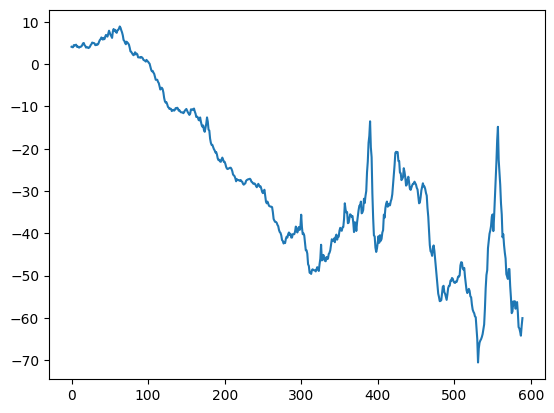

In [72]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM CPI
JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1976-01-01'

"""

# Execute the query and load results into a DataFrame
Inflation_Gap = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Output the final DataFrame
Inflation_Gap

Inflation_Gap = Inflation_Gap.loc[:, ~Inflation_Gap.columns.duplicated()]

# Rename columns to growth rate versions
Inflation_Gap.columns = [
    'Date',
    'CPI_Inflation_Rate',
    'PPI_Inflation_Rate'
]

Inflation_Gap['Inflation_Gap']= Inflation_Gap['PPI_Inflation_Rate'] - Inflation_Gap['CPI_Inflation_Rate'].round(2)

Inflation_Gap['Inflation_Gap'].plot()